In [124]:
from Bio import SeqIO

# SECUENCIA FORWARD

In [125]:
recordF = SeqIO.read("S8_27F.ab1","abi")

In [126]:
len(recordF.seq) #Se observa la longitud de la secuencia Forward.

1275

In [127]:
record_phred=[]     #Se observa la calidad de la secuencia Forward por medio de los valores Phred; 
a='N'               # siendo buena cuando el valor es mayor o igual a 30.
i=0
Tamphred=len(recordF.letter_annotations['phred_quality'])
while i<Tamphred:
    if recordF.letter_annotations['phred_quality'][i]>30:
        record_phred.append(recordF.letter_annotations['phred_quality'][i])
        i=i+1
    else:
        record_phred.append(a)
        i=i+1   
print(record_phred)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 52, 32, 'N', 'N', 'N', 37, 35, 'N', 31, 35, 49, 31, 54, 'N', 'N', 'N', 'N', 48, 32, 'N', 'N', 43, 41, 'N', 'N', 'N', 'N', 46, 58, 45, 35, 'N', 47, 'N', 'N', 39, 58, 31, 39, 58, 54, 37, 38, 'N', 58, 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 46, 'N', 43, 62, 62, 56, 56, 54, 56, 56, 46, 43, 41, 38, 54, 56, 62, 62, 62, 62, 47, 62, 51, 51, 62, 62, 62, 62, 62, 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 32, 42, 51, 62, 62, 62, 62, 62, 62, 62, 49, 62, 62, 62, 47, 62, 62, 62, 62, 62, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 47, 62, 62, 56, 56, 56, 47, 62, 62, 62, 62, 62, 62, 42, 'N', 'N', 'N', 'N', 35, 54, 62, 62, 62, 62, 59, 62, 62, 62, 43, 38, 34, 'N', 38, 34, 59, 62, 62, 49, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6

In [128]:
len(recordF)/2 #Se obtiene la mitad de la secuencia Forward para empezar a hacer el trimaje
               #donde se encuentran los menores puntajes.

637

In [129]:
import numpy as np

In [158]:
i=1     #Función izq.
z=5      #Esta función se van restando z posiciones del valor Phred desde el valor central   
p1i=638
p2i=643
score=30
while p1i>0:
    v1= recordF.letter_annotations['phred_quality'][p2i:p1i]
    v2= np.mean(v1)
    if v2<score:
        break
    else:
        p1i=p1i-i
        p2i=p1i-z
        
print(len(recordF.letter_annotations['phred_quality'][p2i:638]))
print(p2i) #Este es el valor mínimo hasta donde se encuentra la mejor calidad de la secuencia.
print(recordF.letter_annotations['phred_quality'][p2i:638])


194
444
[5, 7, 7, 43, 34, 62, 62, 62, 62, 62, 46, 52, 42, 50, 35, 40, 43, 50, 62, 62, 62, 62, 52, 45, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 54, 62, 62, 62, 52, 58, 58, 58, 58, 54, 58, 58, 54, 58, 58, 54, 52, 58, 58, 58, 58, 54, 54, 58, 54, 58, 54, 58, 54, 58, 58, 58, 58, 42, 52, 58, 54, 54, 58, 58, 58, 54, 58, 58, 54, 54, 54, 54, 54, 58, 58, 58, 54, 41, 54, 54, 58, 54, 42, 58, 58, 58, 54, 54, 54, 54, 58, 58, 58, 58, 58, 58, 54, 41, 58, 54, 52, 54, 58, 58, 58, 58, 49, 58, 53, 50, 49, 58, 51, 49, 53, 58, 51, 54, 51, 49, 49, 29, 51, 52, 58, 51, 50, 58, 58, 58, 58, 48, 50, 51, 51, 54, 53, 54, 58, 58, 37, 51, 49, 51, 54, 58, 58, 32, 51, 54, 53, 54, 53, 39, 51, 50, 54, 52, 50, 37, 51, 58, 50, 58, 54, 31, 58, 49, 39, 53, 53, 53, 53, 53, 53, 51, 44, 58, 58, 52, 53, 51, 58]


In [143]:
i=1     #Función der.
z=5      #Esta función es parecida a la anterior, solo que en vez de restar, suma z posiciones de valores Phred.   
p1d=638
p2d=643
score=30
Tam=len(recordF.letter_annotations['phred_quality'])
while p1d<Tam:
    v1= recordF.letter_annotations['phred_quality'][p1d:p2d]
    v2= np.mean(v1)
    if v2<score:
        break
    else:
        p1d=p1d+i
        p2d=p1d+z
        
print(len(recordF.letter_annotations['phred_quality'][638:p2d]))
print(p2d) #Este es el valor máximo hasta donde se encuentra la mejor calidad de la secuencia.
print(recordF.letter_annotations['phred_quality'][638:p2d])

117
755
[39, 20, 49, 53, 41, 41, 52, 53, 58, 52, 37, 51, 49, 32, 50, 31, 58, 58, 31, 58, 21, 51, 47, 30, 39, 49, 53, 58, 35, 51, 46, 50, 53, 53, 46, 39, 50, 58, 52, 53, 50, 53, 32, 50, 54, 54, 41, 54, 38, 49, 42, 40, 46, 32, 52, 53, 54, 35, 53, 42, 42, 52, 53, 53, 54, 50, 44, 46, 31, 54, 19, 40, 39, 47, 49, 37, 52, 45, 54, 38, 39, 32, 48, 49, 7, 27, 33, 47, 44, 24, 39, 54, 33, 53, 45, 54, 51, 32, 52, 40, 53, 37, 30, 30, 37, 47, 47, 35, 37, 37, 42, 52, 32, 32, 8, 31, 26]


In [132]:
recordF.seq[444:756] #Esta es el slicing de la secuencia Forward con la mejor calidad.
                     #va desde la posición P2i del valor Phred de la función izq.
                     #hasta la posición P2d+1 del valor Phred de la función der.

Seq('ACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACG...GCT', IUPACUnambiguousDNA())

In [133]:
print(len(recordF.seq[444:756])) #el tamaño de la secuencia trimada.

312


In [134]:
import matplotlib.pyplot as plt

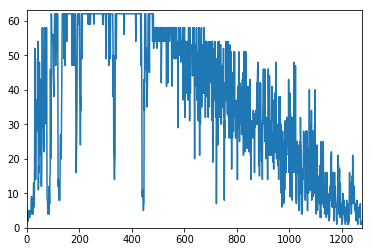

In [135]:
plt.plot(recordF.letter_annotations['phred_quality'])
plt.axis([0,len(recordF.seq),0,max(recordF.letter_annotations['phred_quality'])+1])
plt.show()

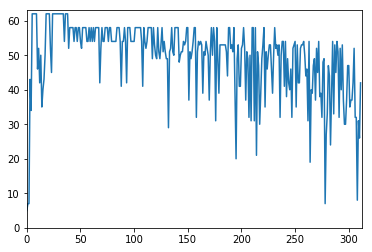

In [136]:
plt.plot(recordF.letter_annotations['phred_quality'][444:756]) #el plot con la seqF trimada.
plt.axis([0,len(recordF.seq[444:756]),0,max(recordF.letter_annotations['phred_quality'][444:756])+1])
plt.show()

# AHORA CON LA SECUENCIA REVERSE.

In [137]:
recordR=SeqIO.read("S8_907R.ab1","abi")

In [138]:
len(recordR.seq) #Se observa la longitud de la secuencia Reverse.

917

In [139]:
record_phred=[]     #Se observa la calidad de la secuencia Reverse por medio de los valores Phred; 
a='N'               # siendo buena cuando el valor es mayor o igual a 30.
i=0
Tamphred=len(recordR.letter_annotations['phred_quality'])
while i<Tamphred:
    if recordR.letter_annotations['phred_quality'][i]>30:
        record_phred.append(recordR.letter_annotations['phred_quality'][i])
        i=i+1
    else:
        record_phred.append(a)
        i=i+1   
print(record_phred)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 32, 33, 39, 53, 38, 50, 39, 34, 'N', 'N', 35, 'N', 'N', 31, 46, 51, 41, 47, 'N', 41, 36, 'N', 52, 58, 52, 58, 42, 32, 58, 47, 54, 49, 34, 'N', 62, 'N', 31, 62, 52, 53, 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 32, 56, 62, 31, 50, 37, 62, 62, 47, 42, 39, 56, 56, 44, 39, 62, 62, 54, 44, 44, 43, 56, 51, 56, 62, 59, 62, 62, 62, 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 39, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 59, 62, 62, 62, 59, 59, 62, 54, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 54, 59, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 59, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 59, 59, 59, 62, 62

In [140]:
len(recordR)/2 #Se obtiene la mitad de la secuencia Reverse para empezar a hacer el trimaje
               #donde se encuentran los menores puntajes.

458

In [147]:
i=1     #Función izq.
z=5      #Esta función se van restando z posiciones del valor Phred desde el valor central   
x1=459
x2=x1-z
score=30
while x1>0:
    v1= recordR.letter_annotations['phred_quality'][x2:x1]
    v2= np.mean(v1)
    if v2<score:
        break
    else:
        x1=x1-i
        x2=x1-z
        
print(len(recordR.letter_annotations['phred_quality'][x2:459]))
print(x2) #Este es el valor mínimo hasta donde se encuentra la mejor calidad de la secuencia.
print(recordR.letter_annotations['phred_quality'][x2:459])

333
126
[19, 16, 19, 25, 39, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 59, 62, 62, 62, 59, 59, 62, 54, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 54, 59, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 59, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 59, 59, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 59, 59, 51, 56, 56, 51, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 49, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,

In [151]:
i=1     #Función der.
z=5      #Esta función es parecida a la anterior, solo que en vez de restar, suma z posiciones de valores Phred.   
y1=458
y2=y1+z
score=30
Tam=len(recordR.letter_annotations['phred_quality'])
while y1<Tam:
    v1= recordR.letter_annotations['phred_quality'][y1:y2]
    v2= np.mean(v1)
    if v2<score:
        break
    else:
        y1=y1+i
        y2=y1+z
        
print(len(recordR.letter_annotations['phred_quality'][458:y2]))
print(y2) #Este es el valor máximo hasta donde se encuentra la mejor calidad de la secuencia.
print(recordR.letter_annotations['phred_quality'][458:y2])

246
704
[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 52, 62, 30, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 33, 49, 58, 46, 58, 58, 58, 58, 58, 58, 47, 58, 58, 54, 58, 58, 58, 58, 54, 58, 52, 58, 58, 58, 43, 48, 58, 54, 58, 54, 58, 58, 53, 58, 58, 58, 49, 49, 54, 41, 31, 58, 58, 58, 58, 58, 54, 54, 58, 54, 58, 54, 54, 54, 54, 54, 58, 58, 58, 54, 54, 58, 54, 58, 58, 58, 58, 54, 52, 54, 58, 58, 54, 58, 58, 54, 54, 58, 58, 50, 48, 41, 38, 49, 41, 48, 53, 46, 41, 41, 54, 58, 50, 51, 52, 54, 45, 27, 51, 53, 52, 51, 38, 46, 58, 54, 58, 58, 49, 58, 45, 30, 46, 33, 51, 51, 48, 47, 58, 58, 58, 50, 53, 52, 47, 39, 58, 50, 44, 43, 26, 58, 49, 36, 51, 53, 46, 51, 58, 58, 58, 50, 34, 30, 26, 18, 30]


In [149]:
recordR.seq[126:705] #Esta es el slicing de la secuencia Reverse con la mejor calidad.
                     #va desde la posición P2 del valor Phred de la función izq.
                     #hasta la posición P2+1 del valor Phred de la función der.

Seq('CATACTTTCGAGCCTCAGCGTCAGTTACAGACCAGACAGCCGCCTTCGCCACTG...GCT', IUPACUnambiguousDNA())

In [153]:
len(recordR.seq[126:705]) #tamaño de la seqR trimada

579

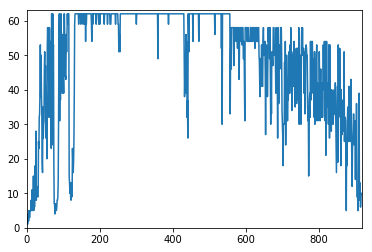

In [154]:
plt.plot(recordR.letter_annotations['phred_quality'])
plt.axis([0,len(recordR.seq),0,max(recordR.letter_annotations['phred_quality'])+1])
plt.show()

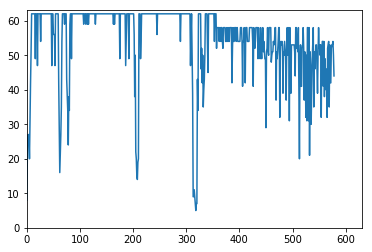

In [155]:
plt.plot(recordF.letter_annotations['phred_quality'][126:705]) #el plot con la seqR trimada.
plt.axis([0,len(recordF.seq[126:756]),0,max(recordF.letter_annotations['phred_quality'][126:705])+1])
plt.show()

# SECUENCIA CONSENSO

In [90]:
record_F=recordF.seq[444:756]
print(record_F)

ACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGTAACTGACGCTGAGGCT


In [156]:
record_R=recordR.seq[126:705]
print(record_R)

CATACTTTCGAGCCTCAGCGTCAGTTACAGACCAGACAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTTCACCGCTACACATGGAGTTCCACTGTCCTCTTCTGCACTCAAGTTTCCCAGTTTCCGATGCACTTCTTCGGTTGAGCCGAAGGCTTTCACATCAGACTTAAAAAACCGCCTGCGCTCGCTTTACGCCCAATAAATCCGGACAACGCTTGCCACCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGTGGCTTTCTGGTTAAATACCGTCAATACCTGAACAGTTACTCTCAGATATGTTCTTCTTTAACAACAGAGTTTTACGAGCCGAAACCCTTCTTCACTCACGCGGCGTTGCTCCATCAGACTTTCGTCCATTGTGGAAGATTCCCTACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGATTACCCTCTCAGGTCGGCTACGTATCATTGCCATGGTGAGCCGTTACCCCACCATCTAGCTAATACGCCGCGGGACCATCCAAAAGTGATAGCCGAAGCCATCTTTCAAGCT


In [157]:
consensus_seq=record_F+'%'+record_R
print(consensus_seq)

ACATATCTGAGAGTAACTGTTCAGGTATTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCAACCGAAGAAGTGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTGGTCTGTAACTGACGCTGAGGCT%CATACTTTCGAGCCTCAGCGTCAGTTACAGACCAGACAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTTCACCGCTACACATGGAGTTCCACTGTCCTCTTCTGCACTCAAGTTTCCCAGTTTCCGATGCACTTCTTCGGTTGAGCCGAAGGCTTTCACATCAGACTTAAAAAACCGCCTGCGCTCGCTTTACGCCCAATAAATCCGGACAACGCTTGCCACCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGTGGCTTTCTGGTTAAATACCGTCAATACCTGAACAGTTACTCTCAGATATGTTCTTCTTTAACAACAGAGTTTTACGAGCCGAAACCCTTCTTCACTCACGCGGCGTTGCTCCATCAGACTTTCGTCCATTGTGGAAGATTCCCTACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGATTACCCTCTCAGGTCGGCTACGTATCATTGCCATGGTGAGCCGTTACCCCACCATCTAGCTAATACGCCGCGGGACCATCCAAAAGTGATAGCCGAAGCCATCTTTCAAGCT
